# **Introduction to Image Processing**

### Importing the required libraries and functions

In [1]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and functions
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library of linear algebra 
import scipy as sp

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module to transform the image (image enhancement)
from skimage import exposure
## Module to apply filters 
from skimage import filters

Pretty printing has been turned OFF


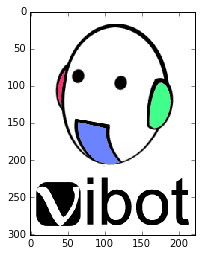

In [2]:
Path = './images/'
image_name = 'lena-grey.bmp'
lena_im = io.imread(Path.__add__(image_name))
io.imshow(lena_im)
vibot_im = io.imread(Path.__add__('vibot-color.jpg'))
io.imshow(vibot_im)
vibot_im_float = img_as_float(vibot_im)
lena_float = img_as_float(lena_im)


**Use io module to read the vibot image in grey and show it**

(301, 222)


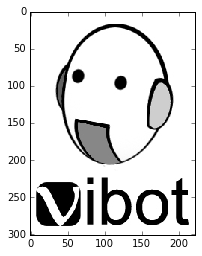

In [3]:

## convering the color of vibot image to gray 
### First way reading it as grey using io.imread
vibot_grey = io.imread(Path.__add__('vibot-color.jpg'), as_grey=True)
io.imshow(vibot_grey)
print vibot_grey.shape

**Use color module from skimage to convert the colors from rgb to gray and also from rgb to hsv. 
Then use matplotlib and show the two images using **

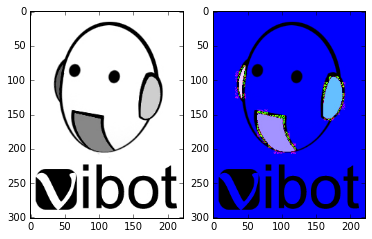

In [4]:
vibot_grey = color.rgb2gray(vibot_im)
vibot_hsv = color.rgb2hsv(vibot_im)

fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.imshow(vibot_grey, cmap=plt.cm.gray)
ax2 = fig.add_subplot(122)
ax2.imshow(vibot_hsv, cmap= plt.cm.hsv)

Plotting the histogram of the angle image 'angle_0.bmp'

/home/masters/anaconda/lib/python2.7/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/masters/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:5933: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 1024 x 1280)
  'this looks transposed (shape is %d x %d)' % x.shape[::-1])


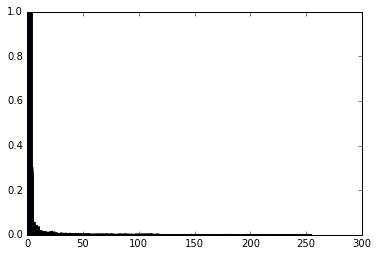

In [5]:
# Plot the histogram of this figure
plt.figure

img = io.imread(Path.__add__('angle_0.bmp'))
# Convert the color image to gray
img = color.rgb2gray(img)
# Convert the image into 8 bits
img = img_as_ubyte(img)
max_img = 255

n, bins, patches = plt.hist(img, max_img, normed=True, range=(0, max_img), histtype='stepfilled')
plt.show()

# **Enhancement and transformation**

In [6]:
## ** Implementing your own functions**

In [7]:
### **1. Negative transform**

** 1.1 Define your neg_trans function, which accpets a maximum value and converts the image ** 

**Return the image in ubyte form**

In [8]:
def neg_trans(x,max_int):
    return img_as_ubyte(max_int- x)

** 1.2 converting and transforming the angle image and show the image and histogram again **

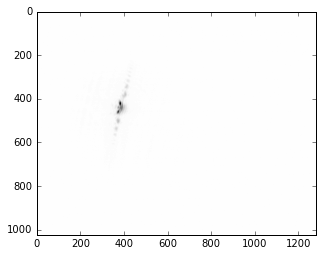

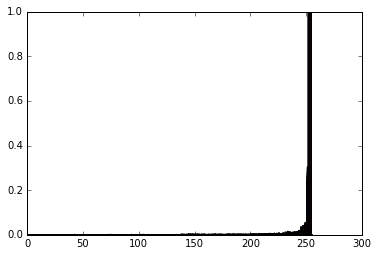

In [9]:
neg_img=neg_trans(img,255)



# Showing the image using plt library in gray color 
plt.figure()
plt.imshow(neg_img, cmap=plt.cm.gray)
plt.show()

plt.figure()
n, bins, patches = plt.hist(neg_img, max_img, normed=True, range =(0, max_img), histtype= 'stepfilled')
plt.show()


### **2. Log-transofrm function**

The log transformation increases the contrast of the low intensities in an image by stretching a narrow range of these low intensities into a wider range of intensities. However, the opposite is taking place regarding the high intensities.


Recall $s = c \log(1 + r)$ 

** 2.1 Define your `log-trans` function , should accpet the image, c, max_int and min_int as input and return the transformed image **


** Note that your input image should be rescaled to be in the range of 0 -1 **

In [10]:
def log_trans(x, c, min_int, max_int):
    # Rescale the input between 0 and 1
    scale = float(max_int - min_int)
    # Compute the transformation
    return np.round(c * scale * np.log2(1.0 +  x / scale)).astype('uint8')

** 2.2 Use your function to transform the angle , then show the transformed image and its histogram **

** c = 5.0 ** 

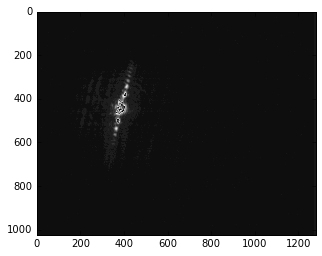

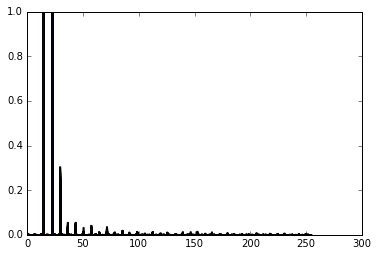

In [11]:
# Compute the negative image


log_img = log_trans(img, 5, 0, 255)

plt.figure()
plt.imshow(log_img, cmap=plt.cm.gray)
plt.show()

plt.figure()
n, bins, patches = plt.hist(log_img, max_img, normed=True, range =(0, max_img), histtype= 'stepfilled')
plt.show()

# Show the image with grey colormap

# Plot the histogram of this figure


 ### **3. Gamma (Power-law) transform **
 
 By looking at the log transformation formulation, there is no ideal way to change the slope of the function. The gamma transformation offer this modulation using a parameter $\gamma$. The transformation function can be formulated as 
 
 Recall $s = cr^{\gamma}$

** 3.1 Define your own gamma transform function ** 

** Your function should accept, the image, min_int, max_int and gamma as input ** 

** Note that your input image should be rescaled to be in the range of 0 -1 **

In [12]:
def gamma_trans(x,c, min_int, max_int,gamma):
    scale = float(max_int - min_int)
    return np.round(c * scale * np.power(x/ scale,gamma)).astype('uint8')

** 3.2 Use your function to transform the angel image gamma = 0.4, then show the image and its histogram** 

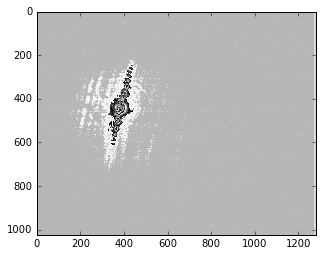

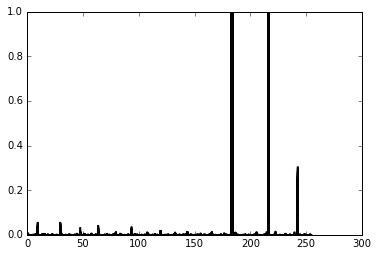

In [13]:

gamma_img = gamma_trans(img, 5, 0, 255,0.4)

plt.figure()
plt.imshow(gamma_img, cmap=plt.cm.gray)
plt.show()
plt.figure()
n, bins, patches = plt.hist(gamma_img, max_img, normed=True, range =(0, max_img), histtype= 'stepfilled')
plt.show()


### **4. Contrast streching **

**4.1 Define your function which stretch the image contrast using minimum and maximum valus from the image**

**This function should accept the input image, calculate the minimum and maximum and rescale the intensities.**

** Return the image as uint8 **

In [14]:
def cont_stret(x):
   
    return np.round(((x-np.min(x))*255)/ (np.max(x)- np.max(x))).astype('uint8')
    

**4.2 Use your function to transform the angel image, show the transformed image and its histogram**

/home/masters/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


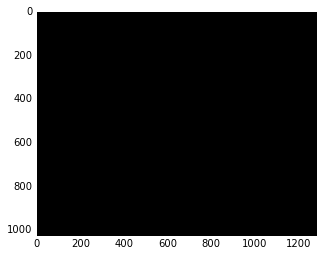

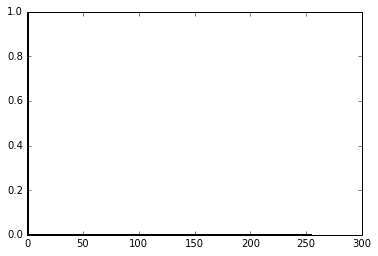

In [15]:


cont_img = cont_stret(img)

plt.figure()
plt.imshow(cont_img, cmap=plt.cm.gray)
plt.show()
plt.figure()
n, bins, patches = plt.hist(cont_img,255, normed=True, range =(0, max_img), histtype= 'stepfilled')
plt.show()

### **5. Histogram equalization** 
Histogram equalization can be used to enhance the contrast in images.

The idea behind the histogram equalization process is that each gray level should have an equal contribution in the image. The function allowing such transformation is in fact the cumulative density function.

**5.1 Define your own histgram equalization function**

**This function should accpet the image, max_int and min_int and return the transformed image**

In [22]:
def hist_eq(x,min_int,max_int):
    pdf, bin_edges=np.histogram(x,bins=max_int+1,range=(min_int,max_int),density=True)
    pdf=pdf/np.sum(pdf)
    cdf = np.cumsum(pdf)
    cdf_real=cdf*float(max_int)
    cdf_int=np.floor(cdf_real).astype('int')
    x_flat=np.zeros((x.shape[0],x.shape[1]))
    for i in range(np.shape(x)[0]):
        for j in range(np.shape(x)[0]):
            x_flat[i][j]=cdf_int[x[i][j]]
    return x_flat,cdf_int

**5.2 Read the satellite image, convert to it gray, ubyte format and use your function to transform it**

** max_int = 255, min_int = 0 **

In [23]:
# Convert the image into 8 bits img_as_ubyte 
satellite_grey = io.imread(Path.__add__('satellite.jpg'), as_grey=True)
satellite_grey = img_as_ubyte(satellite_grey)
max_image = 255


In [24]:
img_flat , img_int = hist_eq(satellite_grey,0,255)

**5.3 Show the transformed image and its histogram**

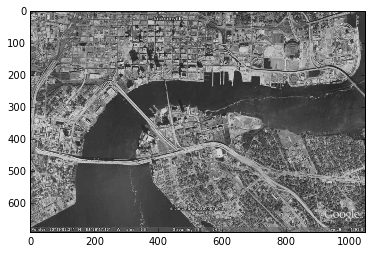

/home/masters/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:5933: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 691 x 1048)
  'this looks transposed (shape is %d x %d)' % x.shape[::-1])


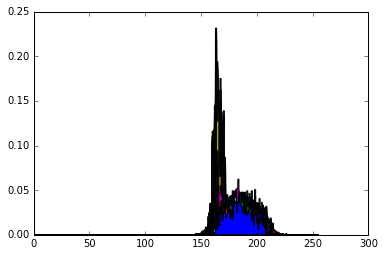

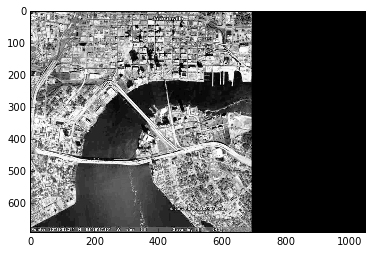

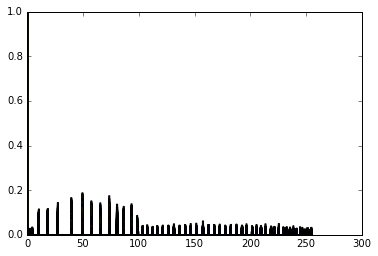

In [25]:

plt.figure()
plt.imshow(satellite_grey, cmap=plt.cm.gray)
plt.show()
plt.figure()
n, bins, patches = plt.hist(satellite_grey, 255, normed=True, range =(0, max_img), histtype= 'stepfilled')
plt.show()

plt.figure()
plt.imshow(img_flat, cmap=plt.cm.gray)
plt.show()
plt.figure()
n, bins, patches = plt.hist(img_flat,255, normed=True, range =(0, max_img), histtype= 'stepfilled')
plt.show()


### **6. Histogram matching**

** Defining `hist_match` function**

In [26]:
def find_inverse_mapping(mapping):
    # Initialise the inverse
    inv_mapping = np.zeros(mapping.shape)
    # Find the index that we can affect for sure
    idx_inv_map = np.unique(mapping)
    
    # For each index
    for idx in idx_inv_map:
        # Find the corresponding index value
        int_val = np.where(mapping == idx)[0][0]
        # Affect this value for the inverse mapping
        inv_mapping[idx] = int_val
        
    # Find the first index which is not zero
    first_elt_idx = np.nonzero(inv_mapping)[0][0]
    for i, elt in enumerate(inv_mapping[first_elt_idx:-1]):
        if (elt == 0):
            inv_mapping[i + first_elt_idx] = inv_mapping[i + first_elt_idx - 1]
        
    return inv_mapping.astype('uint8')



In [27]:
def hist_match(img, pdf_to_match, min_int, max_int):
    # Equalize img
    img_eq, cdf_eq = hist_eq(img, min_int, max_int)
    
    # We need to make the matching now
    ## Compute the transform G
    
    ### Compute the cdf
    cdf = np.cumsum(pdf_to_match)
    
    ### Multiply the cdf by the number of gray values
    cdf_real = cdf * float(max_int)
    ### Round the cdf
    G = np.floor(cdf_real).astype('int')
    
    ## But we need the inverse
    G_1 = find_inverse_mapping(G)
    
    img_match = np.zeros((img_eq.shape[0], img_eq.shape[1]))
    for i in range (np.shape(img_eq)[0]):
        for j in range (np.shape(img_eq)[1]):
            img_match[i][j] = G_1[img_eq[i][j]]
    
    return img_match  

**Creating a manual pdf following a gaussian distribution**

In [28]:
from scipy.stats import norm

x = np.arange(max_img+1)
pdf_to_fit = norm.pdf(x, 150, 30)


**Use the defined function to match the histogram of angel image to `pdf_to_fit`**

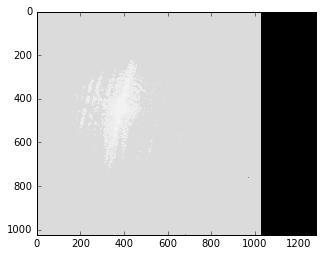

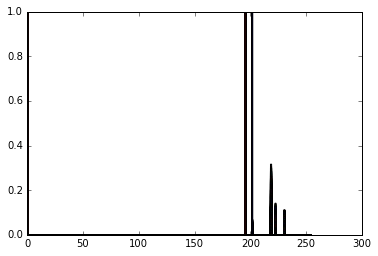

In [50]:
img_match = hist_match(img, pdf_to_fit,0,255)
plt.figure()
plt.imshow(img_match, cmap = cm.Greys_r,vmin=0,vmax=255)
plt.show()
plt.figure()
n, bins, patches = plt.hist(img_match,max_img , normed=True, range =(0, max_img), histtype= 'stepfilled')
plt.show()



    
    

## Trying transformation functions from skimage "exposure" module

In [41]:
# We can import this module now
from skimage import exposure

### **1. Log transform**

Refer to [`exposure.adjust_log()`](http://scikit-image.org/docs/dev/api/skimage.exposure.html#adjust-log) for the use of this function.

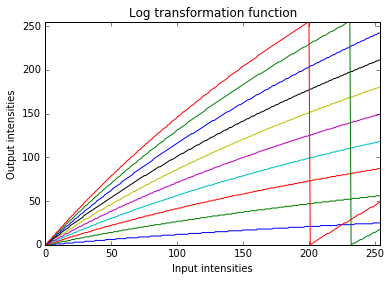

In [29]:
# Define a set of 256 values ranging from 0 to 255
x = np.arange(255, dtype='uint8')

# Define the parameter c
c = np.linspace(.1, 1.2, num=10)

# Plot the transform function
plt.figure()
for c_par in c:
    plt.plot(x, exposure.adjust_log(x, gain = c_par))
plt.xlabel('Input intensities')
plt.ylabel('Output intensities')
plt.title('Log transformation function')
plt.axis('tight')
plt.show()

**Now this is your turn to make this transformation on a real image by using lena-im-float.**

Additionaly, we provide the code to show the histogram of the image. 

Later, use the log to increase the contrast of the magnitude image. Display the resulting image as well as its histogram.

In [30]:
filename = './images/lena-grey.bmp'
lena_im = io.imread(filename)
from skimage import img_as_float
lena_im_float = img_as_float(lena_im)

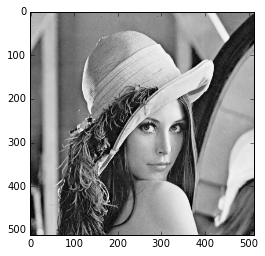

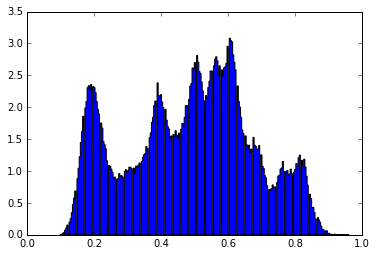

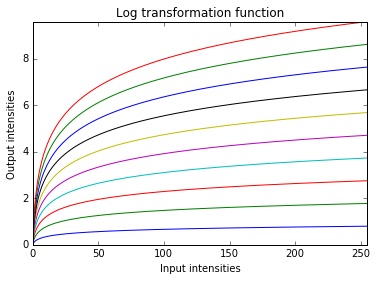

In [51]:
# Show the image and its histogram
plt.figure()
plt.imshow(lena_im_float, cmap=cm.Greys_r)
plt.figure()
n, bins, patches = plt.hist(lena_im_float.flatten(), 256, normed=1, histtype='stepfilled')

# Apply a logarithm transformation
gain = 1.
plt.figure()
for c_par in c:
    plt.plot(x, exposure.adjust_log(x, gain = c_par))
plt.xlabel('Input intensities')
plt.ylabel('Output intensities')
plt.title('Log transformation function')
plt.axis('tight')
plt.show()
#....
# Show the image after transformation and its histogram
#.....



**Note:** A good example where you can see the improvement and changes is to use the magnitude of the  Discrete Fourier Transform (DFT) of the image.
In order to get this image: 
1. Apply the `np.fft.fft2()` to get the fourier image
2. Magnitute are provided by the absolute values of this image
3. In order to move the center of the frequency to the center of the image we can apply `np.fft.fftshift()`

Now you can repeat the previous process on the magnitude image. 

In [31]:
# Compute the Fourier transform an get the magnitude and display it
lena_im_fft = np.fft.fft2(lena_im_float)
lena_im_mag = np.fft.fftshift(np.abs(lena_im_fft))


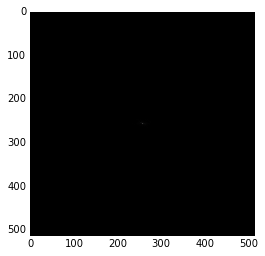

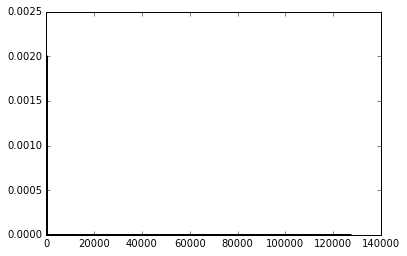

In [32]:
# Show the image and its histogram
plt.figure()
plt.imshow(lena_im_mag, cmap=cm.Greys_r)
plt.figure()
n, bins, patches = plt.hist(lena_im_mag.flatten(), 256, normed=1, histtype='stepfilled')

# Apply a logarithm transformation
#gain = 1.
#lena_im_mag_log = exposure.adjust_log(...., gain=gain)
# Show the image after transformation and its transformation
# ....

### ** 2. Gamma transform**

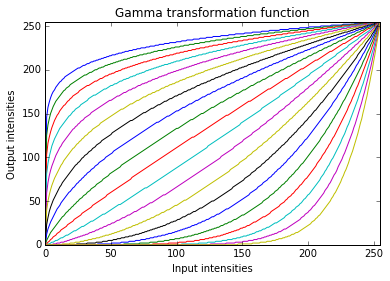

In [33]:
# Define a set of 256 values ranging from 0 to 255
x = np.arange(256, dtype='uint8')

# Define the parameter c
gamma = np.logspace(-1, 1., num=20)

# Plot the transform function
plt.figure()
for g in gamma:
    plt.plot(x, exposure.adjust_gamma(x, gamma=g, gain=1.))
plt.xlabel('Input intensities')
plt.ylabel('Output intensities')
plt.title('Gamma transformation function')
plt.axis('tight')
plt.show()

**Use the gamma function on magnitude image to enhance the image for 10 different values of $\gamma$.**

In [34]:
# Compute the Fourier transform an get the magnitude and display it
# ...
# Show the magnitude image and its histogram
# ...
# Apply a logarithm transformation
# Define the parameter
gain = 1.
gamma = np.logspace(-1, 0, num=10)

# ...

### **3. Sigmoid Transformation**

This function also can be used to enhance the contrast in images.

The transformation function is formulated as $s = \frac{1}{1 + \exp{\left(c(t - r)\right)}}$.

We will illustrate the function by varying the parameter $t$.

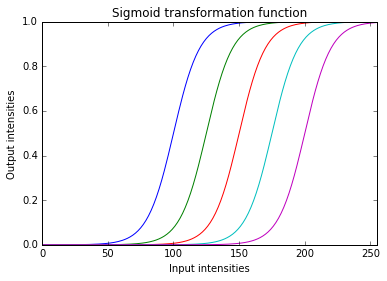

In [35]:
# Define a set of 256 values ranging from 0 to 255
x = np.arange(256, dtype='float')

# Define the parameter c
cut_off = np.linspace(100., 200., num=5)

# Plot the transform function
plt.figure()
for t in cut_off:
    plt.plot(x, exposure.adjust_sigmoid(x, cutoff=t, gain=.1))
plt.xlabel('Input intensities')
plt.ylabel('Output intensities')
plt.title('Sigmoid transformation function')
plt.axis('tight')
plt.show()

**Improve the contrast of the image `satellite.jpg` by setting the cut-off, once you observe the histogram of the image. You can set a gain equal to 10.**

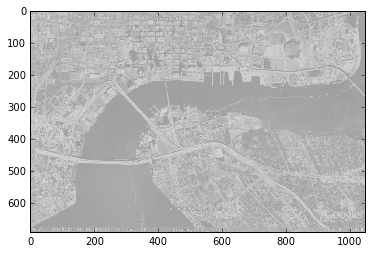

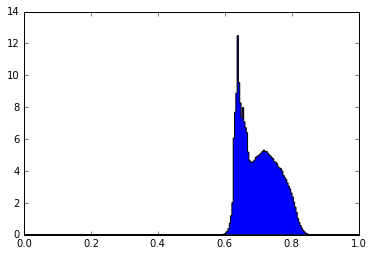

In [36]:
# Load the satellite image
sat_img_float = img_as_float(io.imread('./images/satellite.jpg', as_grey=True))

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_img_float)
plt.figure()
n, bins, patches = plt.hist(sat_img_float.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

# Apply the sigmoid function on the first peak
# ...
# Show the magnitude image and its histogram
# ...

### **4. Contrast Stretching**

Taking the satellite image as an example, it can be noticed that the intensitites are included in the range [0.6, 0.8]. A simple contrast stretching can be used to map the value of the intensity range [0.0, 1.0].

The function `exposure.rescale_intensity` is devoted for this purpose.

**Stretch the intensity value using this function.**

In [ ]:
# Load the satellite image
sat_img_float = img_as_float(io.imread('./images/satellite.jpg', as_grey=True))

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_img_float)
plt.figure()
n, bins, patches = plt.hist(sat_img_float.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

# Apply the sigmoid function on the first peak

# Show the magnitude image and its histogram


### **5. Histogram equalization**
The `exposure.equalize_hist` provide an optimized implementation for such processing. 

**Equalize the histogram of the satellite image.**

In [ ]:
# Load the satellite image
sat_img_float = img_as_float(io.imread('./images/satellite.jpg', as_grey=True))

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_img_float)
plt.figure()
n, bins, patches = plt.hist(sat_img_float.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

# Apply the sigmoid function on the first peak

# Show the magnitude image and its histogram


### **7. Adaptive Histogram Equalization**

The histogram equalization is a global process. The adaptive version allows to perform the histogram equalization for local areas. The contrast will be enhanced in dark and light area of an image which was not possible with the global processing.

The `exposure.equalize_adapthist` function corresponds to this processing in the `skimage`.

**Apply this algorithm for the satellite image with the default parameters regarding the region definition.**

In [ ]:
# Load the satellite image
sat_img_float = img_as_float(io.imread('./images/satellite.jpg', as_grey=True))

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_img_float)
plt.figure()
n, bins, patches = plt.hist(sat_img_float.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

# Apply the sigmoid function on the first peak

# Show the magnitude image and its histogram
